# **Welcome to Discord Bot Development with Python!**
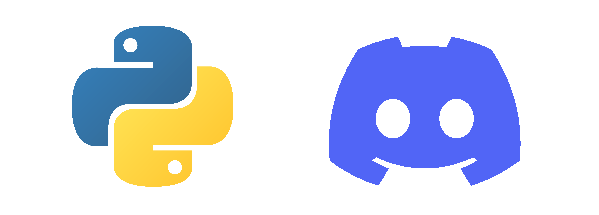

# Course Overview 
---

This is a standalone Python workshop taught on the Google Colab platform. Attending the CEAS Library's Introduction to Python workshops and experience with Python or any other programming language is strongly recommended. This workshop goes over the creation of bots for Discord, a popular text messaging platform, for task automation, server management, and miscellaneous fun applications. Both a Google account and Discord account are required for this workshop. \
\
In this workshop, you will learn: 

*   How Discord bots are made
*   What Discord bots are used for
*   Creating and utalizing enviroment variables (.env)
*   An overview of async. functions and their use in Python
*   Foundational knowledge of the pycord API wrapper

#### Important Links
[Pycord Documentation](https://docs.pycord.dev/en/stable/)

[Discord Developer Portal](https://discord.com/developers/applications)



# Pre-requisites
---

- Please ensure that you have a Discord account.
- It is highly recommended to create a test server for your bot.
  - To do this, click the + "Add a Server" button at the bottom of the server list on the Discord client and select "Create My Own".
  - You can skip the community question when prompted, set a name for the server, and click **Create**.
- You should already have a good-ish understanding of the basics of Python.
below is a list of things that you might want to know before this workshop. If any of these ideas seem foreign to you, don't worry! ***You can still follow along, and if you wish to learn more about what you're actually programming, you should consider taking the CEAS Library's Introduction to Python workshop series.***
  - String manipulation 
  - Data types 
  - Basic conditional statements
  - Importing Python packages




## What and Why?
---
Discord is a popular instant-messaging and voice communicatoin service released in 2015. Since then, the developers of Discord have created the Discord Development Portal to allow programmers to create Bot Users, essentially, accounts that have the appearance of a regular user that can run programmed commands on request. 


**Why do communities use Discord Bots?**

1.   To organize community events
2.   To handle moderation and role assignment for new users
3.   To utilize the powerful API to connect Discord to other services
4.   To create games, fun activities, and reward systems for members



# Getting Started
---
To begin, start by signing into your Discord account on the [Discord Developer Portal](https://discord.com/developers/applications) page. Next to your profile picture in the top right-hand corner, you will see a New Application button $-$ go ahead and click it. 


![](https://i.imgur.com/ValUoQV.png)

Give your application a name on the pop-up and click the **Create** button. You will be taken to the application overview page.


![](https://i.imgur.com/OXgYdbo.png)


Click on the "Bot" tab under settings. 

![](https://i.imgur.com/jRuRk8H.png)

Scroll down on `Privileged Gateway Intents` section, and flip the switch that says "Message Content Intent". This will allow your bot to read messages that users send, and act upon it

![](https://i.imgur.com/MpzQxAM.png)


Click on the *`OAuth2`* tab under settings. In that category, continue to the *`"URL Generator"`* option. Under *`"Scopes"`*, check the box that says *`"bot"`*. When the Bot Permissions tab appears, choose the boxes that say *`"Send Messages"`*, *`"Manage Messages"`*, and *`"Read Message History"`*. Then, copy the generated URL and navigate to it in your browser **in a new tab**. Invite the bot to your test server.


![](https://i.imgur.com/WwAQw1C.png)


Navigate back to the *`"Bot"`* tab under settings and click the "Reset Token" button. **This is your bot's secret token$-$do not share it with anyone!** Copy the string of characters that is given and continue to the next section.


![](https://i.imgur.com/7vqOV30.png)


# Creating Enviroment Variables (.env)
---
**Define** enviroment variables: .env files are simple text-based files that allow you to control constant variables for use in your application but storing them outside of the main program. They typically store configuration data like paths, usernames, passwords, or API keys, allowing applications to operate in different environments without modifying the code. This is especially helpful for creating secret variables (think about what would happen if you commited a file with a secret bot key to GitHub!)

Python has a package that allows us to store important secret variables in our personal Google Drive so we can use them for later. In this code block, we import the `colab_env` package, give it permissions to our Drive, and set our DISCORD_TOKEN which we talked about previously.

This helps keep our bot's private key secure$-$this means that only *we* will be able to log into the bot interface and run explicitly our code. 

In [ ]:
!pip install colab-env -qU
import colab_env

Run the code below and paste your Discord bot's token in the field.


-----> ***Only run once, ever.***  <-----


Since the .env is stored in your Google Drive, it persists through Google Colab runtimes. Once you've run this once, if you get disconnected from Google Colab, you can just re-import `colab-env` using the code block above and then skip straight to Loading Enviroment Variables (.env).

In [ ]:
%reset -f
from colab_env import envvar_handler
from getpass import getpass

envvar_handler.add_env("DISCORD_TOKEN", getpass("DISCORD_TOKEN: "), True)
print(f"Saved enviroment variable to {envvar_handler.envpath}")

#Loading Enviroment Variables (.env)
---
To access the enviroment variable we just set, we import the operating system package for Python `import os` to give it access to our "file system" (in this case, our Google Drive), and then use the `.getenv()` method to assign our token secret to a variable named DISCORD_TOKEN.

In [ ]:
import os
from colab_env import envvar_handler

envvar_handler.envload()
DISCORD_TOKEN = os.getenv("DISCORD_TOKEN")

# Overview of Asynchronous Functions
---

**Define** asynchronous functions: special functions that define code to be executed on seperate *threads*, allowing for several task executions to happen indpendently from the *main function*.

**Define** threads: a set of instructions to be executed by your computer's CPU.

**Define** control flow: the order in which statement, assignments, and functions are called in a program.



### Here's an example of the control flow of a normal function:
![](https://i.imgur.com/Ggfr9kB.png)

### And here's an example of the control flow of an async function:
![](https://i.imgur.com/OL3KsS8.png)



**How to implement asynchronous functions?** Using async functions in Python is easy. First, we can import the `asyncio` package in our code. We can use the `async` and `await` keywords to establish asynchronous control flow. 

**Keyword `async`:** designates a Python function as asynchronous--the "other function" in the diagram above

**Keyword `await`:** essentially, adding this to a call to a function lets Python know that we need to wait for the "other" action to return a value before continuing along in the main function.



When we talked about async functions, we did not touch upon the downsides they do not work perfectly in Jupiter notebooks, the underlying technology of Google Colab, the platform we are using currently. To overcome the problem of async functions not being able to be nested, we can install the `nest_asyncio` package to sidestep this limitation. We apply it to the notebook below with the method `.apply()`.



Below is a small example of asyncio functions being used in Python, from the [Coroutines and Tasks Python 3.10 documentation](https://docs.python.org/3/library/asyncio-task.html). Please run this block so that nest_asyncio is installed:

In [ ]:
!pip install nest_asyncio

In [3]:
import asyncio
import nest_asyncio as n_asyncio
n_asyncio.apply()

import time

async def say_after(time_delay, string):
    await asyncio.sleep(time_delay)
    print(string)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(1, 'hello')
    await say_after(2, 'world')

    print(f"finished at {time.strftime('%X')}")

asyncio.run(main())

started at 12:27:52
hello
world
finished at 12:27:55


# What is Discord Bot?

A Discord bot is an automated program that can perform tasks on a Discord server, such as moderating chat, playing music, or providing information. Bots interact with users by listening to events and responding to commands, making them a powerful tool to enhance the functionality of a server.

### Attributes of a Discord Bot

A bot in Discord has several attributes, which define its functionality and how it interacts with the Discord API. Key attributes include:

- Token: The authentication key used to connect the bot to Discord.
- Prefix: The character(s) that the bot listens for to recognize commands (e.g., / or _).
- Intents: Special flags that determine what types of events the bot is allowed to respond to. 
- Commands: Defined actions that the bot can execute based on user input.
- Events: Actions in Discord (like message sends or member joins) that trigger a bot's response.

# How to develop a Discord Bot with Python?
---
 The `py-cord` library provides the tools needed to interact with Discord’s API, allowing developers to create bots that can automate tasks, respond to commands, and more within Discord servers.

### Key Things to Know About Py-Cord:

1. Slash Commands: Py-Cord has built-in support for slash commands, offering more intuitive command interactions for users without needing a command prefix.
2. Asynchronous Framework: Py-Cord operates asynchronously, meaning your bot can perform multiple tasks at once without blocking other operations.
3. Interactions: The library simplifies the use of interactive elements like buttons and dropdowns, which are becoming increasingly important for Discord bots.

We can easily install it from the pip package `py-cord`, and we'll import it by calling `import discord`.

In [ ]:
!pip install py-cord

In [ ]:
from discord.ext import commands
import discord

### Instantiating our new Bot:
---

One thing you need to concern about when creating or instantiating a new Bot is intents. 
Intents parameters can only accept `True` or `False`. If an intent is set to true, the bot is allowed to conduct that types of event in the channel.
List of Intents can be found here: 
[List of Intents](https://discord.com/developers/docs/topics/gateway#gateway-intents)

Two types of intents exist:

- **Standard intents** can be passed by default. You don't need any additional permissions or configurations.
- **Privileged intents** require you to toggle the intent for your bot in your app's settings within the Developer Portal before passing said intent. 
    - There are 3 privileged intents having the default value as False:
        - guild_members
        - message_content
        - guild_presences

If you want to your Bot have one of these permission, you need to switch it to `True`.


In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate a new Bot
bot = discord.Bot(intents=intents)

#### Discord Bot Events:
---

- `Events` are system-defined actions that the bot listens for and responds to.
- When an event occurs in Discord (like a message being sent or a new member join the channel), the corresponding `event handler` in the bot is called, and it can perform any necessary actions (e.g., responding to the message, welcoming a new member).
- Some common events:
    - `on_ready`: This event is triggered when the bot has successfully connected to Discord and is ready to interact.
    - `on_message`: Triggered whenever a message is sent in a channel the bot has access to. This is commonly used to process messages, run commands, or respond based on certain keywords.
    - `on_member_join`: Triggered when a new member joins the server. This event is often used to welcome new members or assign them roles automatically.
    - `on_command_error`: Triggered when there’s an error in the bot’s command execution (e.g., wrong command input, missing permissions). This is helpful for error handling and providing user feedback.

In [ ]:
# Define an async function under the client event parameter.
# This function will print the bot user's client ID to our console
# once the async function has returned that we have logged in sucessfully.
@bot.event
async def on_ready():
    print('We have logged in as {0.user}'.format(bot))

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

#### Exercise 1: Good Bot Reaction
---

We can make bots do all kinds of interesting things triggered by user's events. In this exercise, let's make our bot react to every message that contains the string "Good bot" or "good bot" or "good Bot" with the heart emoji (💖).

As we pass the message as a parameter we can interact with every attributes of it like `.content` (to target the content of the message) or even `.add-reaction` to add reaction to that message

**Hint #1:** You need to standardize the input message from the user into a format to add a condition for the bot to add reaction. You can use the `.lower()` to turn every string into lower case.

**Hint #2:** pycord and Python both support Unicode characters in code. You should try using `'💖'` as a string literal in your answer. 

In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate the Bot
bot = discord.Bot(intents=intents)

In [ ]:
# exercise 1
# good bot
@bot.event
async def on_message(message):
    if message.content.lower() == 'good bot':
        pass # replace this with your code
    

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

### Slash commands
---
Slash commands in Discord are a modern and intuitive way for users to interact with bots by typing a `/` followed by the command name. Unlike traditional prefixed commands, slash commands offer autocomplete features, built-in descriptions, and argument suggestions, making them more user-friendly.

Why we use slash `/` as a prefix but not other sign?
There are several advantages of using slash commands such as providing autocompletion, clear descriptions, and argument validation, all within Discord’s native UI, etc. But one of the biggest reason is that it has built-in system, which supports developer with modification, and it is user-friendly.

Build a structure of a new slash command `/`:


In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate a new Bot
bot = discord.Bot(intents=intents)

In [ ]:

# ping -- returns message "Pong!" to check the bot's online status.
@bot.slash_command(name="ping", description="Check if the bot is online")
async def ping(ctx):
    await ctx.respond('Pong!')


### Slash command Structure: 
---
`@bot.slash_command` is a decorator or a declarator to define a new slash command in Pycord with these parameters:
- `name`: The command's name, which users will type after `/`.
- `description`: A short explanation of what the command does, which is shown in the autocomplete menu.

`async def ping(ctx)` is a sample of command function or the interesting things or the behaviours your bot will do behind the scence. It is an asynchronous function (`async`). 

- `ctx`: The `context` object that contains information about the interaction, like the user who invoked the command, the channel, and various methods to interact with the user 

`ctx.respond()`: is used to send a response back to the user 

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

### Context or `ctx` Object
---

The `ctx` or `context` object passed from the function contains information about the sender (or the `author` of the message). 

Here are some key attributes of `ctx.author`:
- `id`: The unique Discord ID of the user.
- `name`: The username of the user (without the discriminator).
- `display_name`: The display name of the user, which could be different from their username if they have set a nickname
- `mention`: The string that will mention the user when sent in a message.
- `avatar`: The URL of the user's avatar image.
- `status`: The user's current status
- ....

Here some methods available for `ctx.author`:
- `send()`: Send a private (DM) message to the user.
- `respond()`: Respond to the author's command
- ....

### Exercise #2
---
**Writing the "hello" command:** create the code for a command that, when executed by a user, will make the bot return a message saying "Hello, {username}!" where user is the username/id of the user who requested the command. It should be a simple, one line command.

**Hint #1**: check out the `ping` command on our bot to see the syntax for sending bot messages.

It might be helpful to [check the documentation.](https://docs.pycord.dev/en/stable/ext/commands/api.html#discord.ext.commands.Context)


In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate a new Bot
bot = discord.Bot(intents=intents)

In [ ]:
# exercise 2
# hello - will return the string "Hello, user!" depending on user.
@bot.slash_command(name="hello")
async def hello(ctx):
    pass # replace this with your code

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

### Exercise #3 (Bonus)
---

Writing the **"help"** command: create the code for a command that, when executed by a user, will make the bot **direct message** the user once per command with the name of the command for all available commands. 

**Hint #1:** We now know how to get the author of a command. But we do *not* know how to send a direct message, only one to the channel that the command was sent from using `ctx.author` and `send`. 

**Hint #2:** We can create a list of available commands by declaring them in a list `["ping","help"...]`.

In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate a new Bot
bot = discord.Bot(intents=intents)

In [ ]:
# exercise 3
# help -- will direct message the user a help message.
@bot.slash_command(name="help")
async def help(ctx, cmd):
    if cmd == 'help':
        # replace this with your code
        await ctx.respond('this message')

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

### Embeds:
---
`Embeds` in Py-Cord are a powerful way to format messages with rich content. They allow you to add fields, images, and styling to make your messages more interactive and visually appealing.

We will learn some basics of `embed`:
- `title`: The main title of the embed. 

        Example: embed.title = "Embed Title"
- `description`: A longer text body below the title.

        Example: embed.description = "This is an embed description."
- `thumbnail`: Adds a small image to the upper-right corner of the embed. 

        Example: embed.set_thumbnail(url={Here is where you can find your image})
- `fields`: You can add multiple fields to an embed. Each field has a name, a value, and an optional inline flag to control if it should appear alongside other fields.

        Example: embed.add_field(name="Activity", value="This is the status field.", inline=False)

### Exercise #4 (challenge)
---

Bots can send what are called Embeds in their Discord messages. Here's an example:

![](https://i.imgur.com/hSHwZBv.png)

Let's recreate this! Here's how the bot should build the embed:

- The title should be the author's `name` and `status`
- The thumbnail should be the author's avatar

**Hint #1:** You should use ctx.author to get the author's information 
**Hint #2:** The structure of the embeds will include 1 `title`, 1 `thumbnail` and 1 activity `field`




In [ ]:
# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
# message_content intents is set to True to allow the Bot to take in your command
# and then do interesting things
intents.message_content = True
# Instantiate a new Bot
bot = discord.Bot(intents=intents)

In [ ]:
# exercise 4
#aboutme - will return the name and the pfp image of the user in an embed
@bot.slash_command(name="about-me")
async def aboutme(ctx):
    embed=discord.Embed(title='replace this') # replace this with your code
    embed.set_thumbnail(url='replace this')
    await ctx.respond(embed=embed)

In [ ]:
# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
# Abort this run after you see the result
bot.run(DISCORD_TOKEN)

# The 'whole' Bot for testing
---

In [ ]:
from discord.ext import commands
import discord

# Assign the client variable to the result of discord.Client().
intents = discord.Intents.default()
intents.message_content = True

bot = discord.Bot(intents=intents)

# Define an async function under the client event parameter.
# This function will print the bot user's client ID to our console
# once the async function has returned that we have logged in sucessfully.
@bot.event
async def on_ready():
    print('We have logged in as {0.user}'.format(bot))


# ping -- returns message "Pong!" to check the bot's online status.
@bot.slash_command(name="ping", description="Ping the bot")
async def ping(ctx):
    await ctx.respond('Pong!')

# hello - will return the string "Hello, user!" depending on user.
@bot.slash_command(name="hello")
async def hello(ctx):
    await ctx.respond('Hello ' + ctx.author.name+'!')
    

#aboutme - will return the name and the pfp image of the user in an embed
@bot.slash_command(name="about-me")
async def aboutme(ctx):
    embed=discord.Embed(title=ctx.user.display_name)
    embed.set_thumbnail(url=ctx.user.display_avatar)
    await ctx.respond(embed=embed)

# help -- will direct message the user a help message.
@bot.slash_command(name="help", description='Type in the command that you want to know more about')
async def help(ctx, cmd):
    commands = {
        'ping': ' is to check if the bot is online or not',
        'hello': ' is to say hello to the bot',
        'help': ' is to get help with the bot'
    }
    await ctx.send(cmd.upper() + commands[cmd])
    
# good bot
@bot.event
async def on_message(message):
    if message.content.lower() == 'good bot':
      print('we re bt to run sth')
      await message.add_reaction('💖')

# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user. To do this, we just simply need to 
# retrieve the token we store in the env
bot.run(DISCORD_TOKEN)

# Additional Information 
---

You've now completed the Discord Bot Development with Python workshop. Thank you for attending! For those of you who want to **develop and maintain a full bot**, I suggest following the steps below to get **3 free months of hosting**, as long as you're a university student.

*   Log into your GitHub account
*   Register with the [GitHub Student Developer Pack](https://education.github.com/pack).
  * This provides free subscriptions to many popular development services as long as you're a student.
* Navigate to the [replit Student Hacker Plan](https://replit.com/site/github-students) page and sign in using your GitHub account.
  * replit is a well established online IDE that allows you to run code with many different languages.
  * We can use replit to host our Discord bot permanently for 3 months (the length of the replit Hacker Plan for Students).
* Develop your bot on the replit editor using the code you've learned in this workshop, run it, and check the "Always On" option in the details of the file (click the name).

Written by [Jack Margeson](marg.es/) for the University of Cincinnati's CEAS Library workshop program.

Last updated by Huu Quang Nhat Nguyen